In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
plot_x=np.linspace(-1,6,141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

In [3]:
plot_y=(plot_x-2.5)**2-1

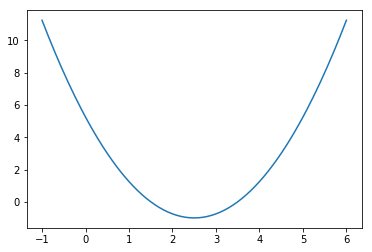

In [4]:
plt.plot(plot_x,plot_y)

In [5]:
def dJ(theta):
    return 2*(theta-2.5)

In [6]:
def J(theta):
    return (theta-2.5)**2-1

In [7]:
theta=0.0
eta=0.1
epsilon=1e-8
while True:
    gradient=dJ(theta)
    last_theta=theta
    theta=theta-eta*gradient
    
    if(abs(J(theta)-J(last_theta))<epsilon):
        break

print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


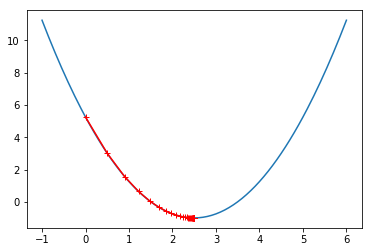

In [8]:
theta=0.0
theta_history=[theta]
while True:
    gradient=dJ(theta)
    last_theta=theta
    theta=theta-eta*gradient
    theta_history.append(theta)
    
    if(abs(J(theta)-J(last_theta))<epsilon):
        break
        
plt.plot(plot_x,J(plot_x))
plt.plot(np.array(theta_history),J(np.array(theta_history)),color='r',marker='+')

In [9]:
def gradient_descent(initial_theta,eta,n_iters=1e4,epsilon=1e-8):
    theta=initial_theta
    theta_history.append(initial_theta)
    i_iter=0
    
    while i_iter<n_iters:
        gradient=dJ(theta)
        last_theta=theta
        theta=theta-eta*gradient
        theta_history.append(theta)
        
        if(abs(J(theta)-J(last_theta))<epsilon):
            break
        i_iter+=1
def plot_theta_history():
    plt.plot(plot_x,J(plot_x))
    plt.plot(np.array(theta_history),J(np.array(theta_history)),color='r',marker='+')
    plt.show()

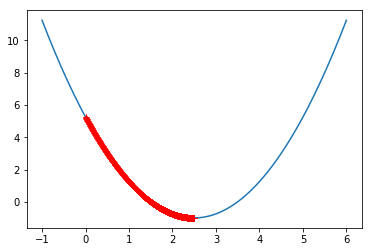

In [10]:
eta=0.001
theta_history=[]
gradient_descent(0.,eta)
plot_theta_history()

In [11]:
len(theta_history)

3682

In [12]:
x=2*np.random.random(size=100)
y=x*3.+4.+np.random.normal(size=100)
X=x.reshape(-1,1)

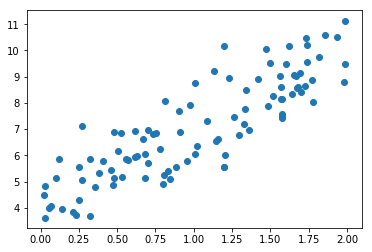

In [13]:
plt.scatter(X,y)

In [14]:
def J(theta,X_b,y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')

In [15]:
def dJ(theta,X_b,y):
    res=np.empty(len(theta))
    res[0]=np.sum(X_b.dot(theta)-y)
    for i in range(1,len(theta)):
        res[i]=(X_b.dot(theta)-y).dot(X_b[:,1])
    return res*2/len(X_b)

In [16]:
def gradient_descent(X_b,y,initial_theta,eta,n_iters=1e4,epsilon=1e-8):
    theta=initial_theta
    i_iter=0
    
    while i_iter<n_iters:
        gradient=dJ(theta,X_b,y)
        last_theta=theta
        theta=theta-eta*gradient
        
        if(abs(J(theta,X_b,y)-J(last_theta,X_b,y))<epsilon):
            break
        i_iter+=1
    return theta

In [17]:
X_b=np.hstack([np.ones((len(X),1)),x.reshape(-1,1)])
initial_theta=np.zeros(X_b.shape[1])
eta=0.01
theta=gradient_descent(X_b,y,initial_theta,eta)
theta

array([4.17701982, 2.82351449])

In [18]:
X_b.shape

(100, 2)

In [19]:
from LinearRegression import LinearRegression
lin_reg=LinearRegression()


In [20]:
lin_reg.fit_gd(X,y)

LinearRegression()

In [21]:
lin_reg.coef_

array([2.82351449])

In [22]:
lin_reg.interception_

4.177019818957504

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [24]:
standarScaler=StandardScaler()

In [25]:
boston=datasets.load_boston()
X=boston.data
y=boston.target


In [26]:
X=X[y<50.0]
y=y[y<50.0]

In [27]:
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=666)

In [28]:
standarScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
X_train_standard=standarScaler.transform(X_train)

In [30]:
lin_reg3=LinearRegression()
%time lin_reg3.fit_gd(X_train_standard,y_train)

Wall time: 321 ms


LinearRegression()

In [31]:
X_test_standard=standarScaler.transform(X_test)

In [32]:
lin_reg3.score(X_test_standard,y_test)

0.8008795460586365

In [33]:
m=10000
n=10000
big_X=np.random.normal(size=(m,n))
true_theta=np.random.uniform(0.0,1000.0,size=n+1)

In [34]:
big_y=big_X.dot(true_theta[1:])+true_theta[0]+np.random.normal(0.,10,size=m)

In [35]:
big_y.shape

(10000,)

In [36]:
big_X.shape

(10000, 10000)

In [37]:
# big_reg=LinearRegression()
# %time big_reg.fit_normal(big_X,big_y)

In [38]:
# big_reg2=LinearRegression()
# %time big_reg2.fit_gd(big_X,big_y)

### 随机梯度下降法

In [39]:
m=10000
x=np.random.normal(size=m)
X=x.reshape(-1,1)
y=4.*x+3.+np.random.normal(0,3.,size=m)

In [40]:
def dJ_sgd(theta,X_b_i,y_i):
    return X_b_i.T.dot(X_b_i.dot(theta)-y_i)*2.

In [41]:
def sgd(X_b,y,initial_theta,n_iters):
    t0=5
    t1=50
    def learning_rate(t):
        return t0/(t+t1)
    theta=initial_theta
    for cur_iter in range(n_iters):
        rand_i=np.random.randint(len(X_b))
        gradient=dJ_sgd(theta,X_b[rand_i],y[rand_i])
        theta=theta-learning_rate(cur_iter)*gradient
    return theta


In [42]:
%%time
X_b=np.hstack([np.ones((len(X),1)),X])
initial_theta=np.zeros(X_b.shape[1])
theta=sgd(X_b,y,initial_theta,n_iters=len(X_b)//3)

Wall time: 42.9 ms


In [43]:
theta

array([2.92303963, 3.86946828])

In [44]:
from LinearRegression import  LinearRegression
lin_reg=LinearRegression()

In [45]:
lin_reg.fit_sgd(X,y,n_iters=2)

In [46]:
lin_reg.coef_

array([4.00244305])

In [47]:
lin_reg.interception_

3.016390296023006

### 真实使用我们的自己的数据

In [61]:
from sklearn import datasets
import matplotlib.pyplot as plt
boston=datasets.load_boston()

In [51]:
X=boston.data
y=boston.target

In [52]:
X=X[y<50.0]
y=y[y<50.0]


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=666)

In [55]:
from sklearn.preprocessing import  StandardScaler
standarScaler=StandardScaler()

In [56]:
standarScaler.fit(X_train)
X_train_standard=standarScaler.transform(X_train)
X_test_standard=standarScaler.transform(X_test)

In [57]:
from LinearRegression import LinearRegression

In [66]:
lin_reg=LinearRegression()
%time lin_reg.fit_sgd(X_train_standard,y_train,n_iters=20)
lin_reg.score(X_test_standard,y_test)

Wall time: 66.3 ms


0.7389063593576676

### sk-learn中的随机梯度下降法

In [67]:
from sklearn.linear_model import  SGDRegressor

In [69]:
sgd_reg=SGDRegressor()
%time sgd_reg.fit(X_train_standard,y_train)
sgd_reg.score(X_test_standard,y_test)

Wall time: 998 µs


C:\Users\lenovo-M\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7805296317284807

In [71]:
sgd_reg=SGDRegressor(n_iter=20)
%time sgd_reg.fit(X_train_standard,y_train)
sgd_reg.score(X_test_standard,y_test)

Wall time: 1.96 ms


C:\Users\lenovo-M\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.7939183811401858

### 如何调试梯度

In [72]:
np.random.seed(666)
X=np.random.random(size=(1000,10))

In [74]:
true_theta=np.arange(1,12,dtype=float)

In [75]:
X_b=np.hstack([np.ones((len(X),1)),X])
y=X_b.dot(true_theta)+np.random.normal(size=1000)

In [76]:
def J(theta,X_b,y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')

In [77]:
        def dJ_math(theta,X_b,y):
            return X_b.T.dot(X_b.dot(theta)-y)*2./len(y)

In [82]:
def dJ_debug(theta,X_b,y,epsilon=0.01):
    res=np.empty(len(theta))
    for i in range(len(theta)):
        theta_1=theta.copy()
        theta_1[i]+=epsilon
        theta_2=theta.copy()
        theta_2[i]-=epsilon
        res[i]=(J(theta_1,X_b,y)-J(theta_2,X_b,y))/(2*epsilon)
    return res

In [83]:
def gradient_descent(dJ,X_b,y,initial_theta,eta,n_iters=1e4,epsilon=1e-8):
    theta=initial_theta
    i_iter=0
    
    while i_iter<n_iters:
        gradient=dJ(theta,X_b,y)
        last_theta=theta
        theta=theta-eta*gradient
        
        if(abs(J(theta,X_b,y)-J(last_theta,X_b,y))<epsilon):
            break
        i_iter+=1
    return theta

In [85]:
X_b=np.hstack([np.ones((len(X),1)),X])
initial_theta=np.zeros(X_b.shape[1])
eta=0.01
%time gradient_descent(dJ_debug,X_b,y,initial_theta,eta)

Wall time: 3.48 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [86]:
%time gradient_descent(dJ_math,X_b,y,initial_theta,eta)

Wall time: 618 ms


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])